# Exercise 2: Filtering

Exercise: How can we use intensity based filtering to remove background?

1. Execute the following code to load the example image `image_nuclei_noisy` and display it.

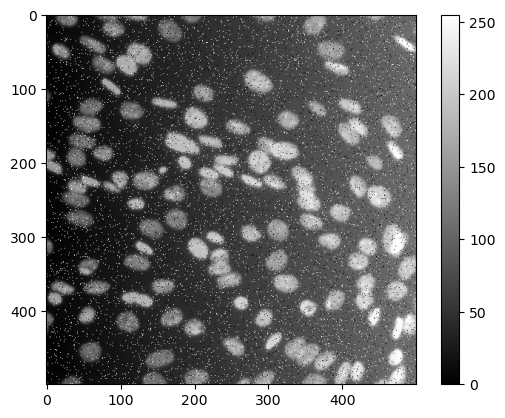

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
import skimage.morphology
import skimage.filters
import stackview

image_nuclei = skimage.io.imread('https://cildata.crbs.ucsd.edu/media/images/13585/13585.tif')[0:500,0:500,2]
image_nuclei_noisy = image_nuclei // 2
image_nuclei_noisy = image_nuclei_noisy + 50 * np.linspace(0, 1, image_nuclei_noisy.shape[1]) * np.ones(image_nuclei_noisy.shape)
image_nuclei_noisy = (image_nuclei_noisy - image_nuclei_noisy.min()) / (image_nuclei_noisy.max() - image_nuclei_noisy.min())
image_nuclei_noisy = skimage.util.random_noise(image_nuclei_noisy, mode='s&p')
image_nuclei_noisy = (image_nuclei_noisy * 255).astype(np.uint8)

plt.imshow(image_nuclei_noisy, cmap='gray')
plt.colorbar()

2. Try segmenting the image `image_nuclear_noisy` using a threshold. What do you observe?

In [2]:
stackview.switch([image_nuclei_noisy, image_nuclei_noisy > 120])

3. Find a way to perform local background subtraction on the image using filtering. Hint: Filtering can be used to estimate the background.

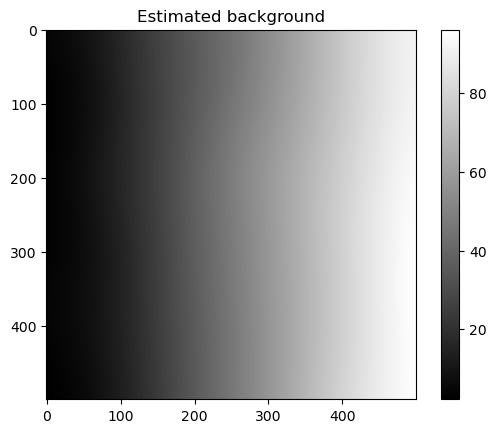

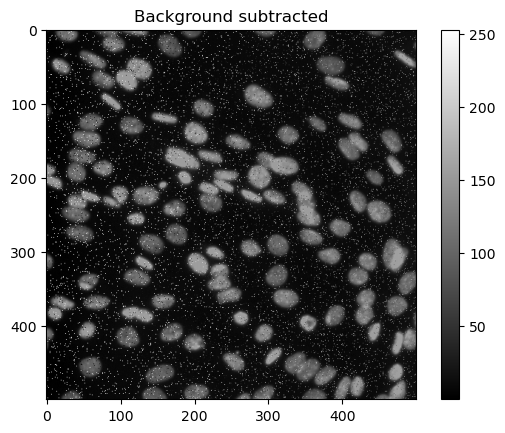

In [3]:
background = skimage.filters.rank.percentile(image_nuclei_noisy, p0=0.05, footprint=np.ones((100, 100), dtype=bool))
background = skimage.filters.gaussian(background, sigma=50, preserve_range=True)

plt.figure()
plt.title('Estimated background')
plt.imshow(background, cmap='gray')
plt.colorbar()

image_bs = image_nuclei_noisy - background
image_bs = np.abs(image_bs) # remove negative values

plt.figure()
plt.title('Background subtracted')
plt.imshow(image_bs, cmap='gray')
plt.colorbar()

4. Try segmenting the background subtract image using a threshold.

In [4]:
stackview.switch([image_bs, image_bs > skimage.filters.threshold_otsu(image_bs)])

5. Denoise the background subtracted image using image filtering.

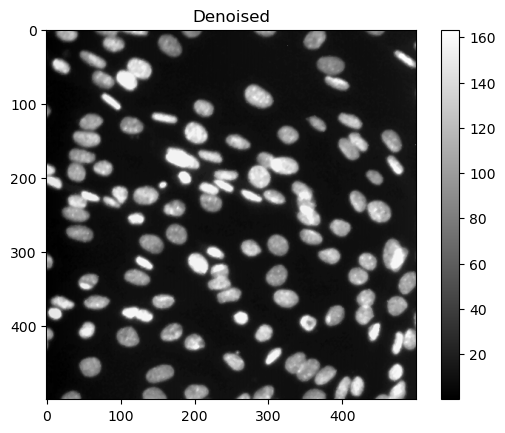

In [5]:
image_denoised = skimage.filters.median(image_bs, footprint=skimage.morphology.square(3))

plt.figure()
plt.title('Denoised')
plt.imshow(image_denoised, cmap='gray')
plt.colorbar()

6. Try segmenting the denoised and background subtract image using a threshold.

In [6]:
image_denoised_th = image_denoised > skimage.filters.threshold_otsu(image_denoised)

stackview.switch([image_denoised, image_denoised_th])

7. Visualize the steps of the exercise including
    - the original noisy image
    - the background subtracted image
    - the denoised image
    - the thresholded denoised image

In [7]:
stackview.switch([image_nuclei_noisy, image_bs, image_denoised, image_denoised_th])

8. Instead of the background subtracted and denoised image, threshold the image for which only background has been subtracted. Try to eliminate small objects using morphological operations. 

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

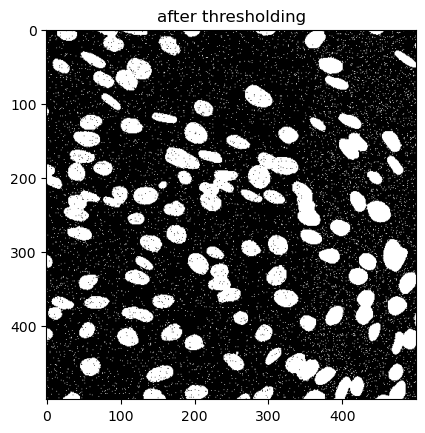

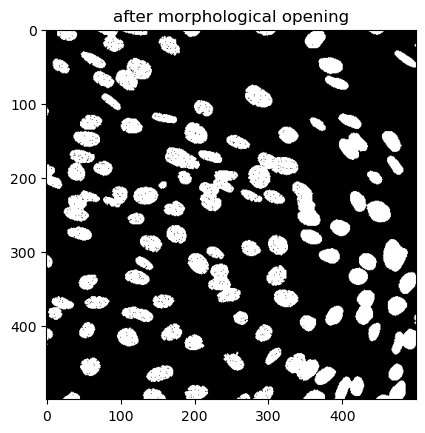

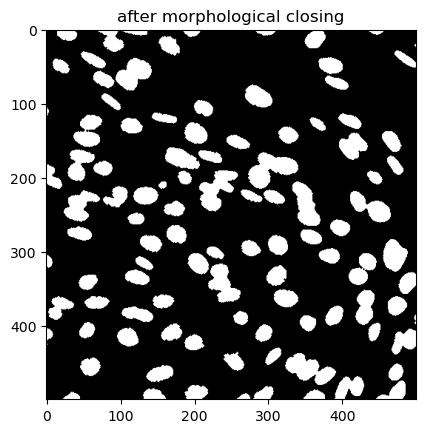

In [8]:
image_bs_th = image_bs > skimage.filters.threshold_otsu(image_bs)

plt.imshow(image_bs_th, cmap='gray')
plt.title('after thresholding')

image_bs_th_processed = skimage.morphology.isotropic_erosion(image_bs_th, radius=1)
image_bs_th_processed = skimage.morphology.isotropic_dilation(image_bs_th_processed, radius=1)

plt.figure()
plt.imshow(image_bs_th_processed, cmap='gray')
plt.title('after morphological opening')

image_bs_th_processed = skimage.morphology.isotropic_dilation(image_bs_th_processed, radius=1)
image_bs_th_processed = skimage.morphology.isotropic_erosion(image_bs_th_processed, radius=1)

plt.figure()
plt.imshow(image_bs_th_processed, cmap='gray')
plt.title('after morphological closing')

image_bs_th
# stackview.switch([image_bs_th])